In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import sketch

%matplotlib inline

In [3]:
# Source: https://www.kaggle.com/datasets/prasad22/ca-independent-medical-review

datapath = Path('./data')
datafilename = 'Independent_Medical_Review__IMR__Determinations__Trend.csv'

In [4]:
df = pd.read_csv(datapath / datafilename)

In [5]:
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


In [7]:
df.sketch.ask('Is there a difference in Determination by Patient Gender')

In [8]:
df.sketch.howto('Plot Determination by age')

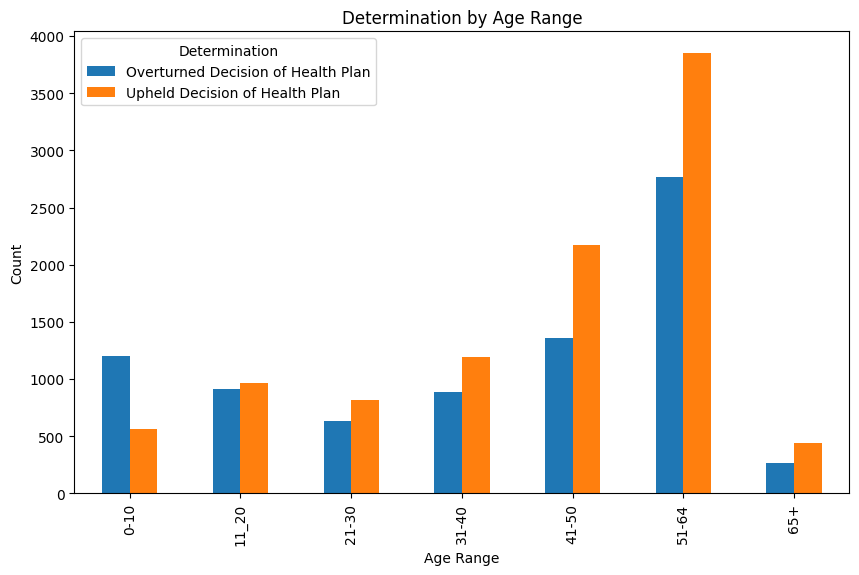

In [9]:
# Plot Determination by age
import matplotlib.pyplot as plt

# Create a bar chart of Determination by Age Range
df.groupby('Age Range')['Determination'].value_counts().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Determination by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [10]:
df.Findings.iloc[5]

'Nature of Statutory Criteria/Case Summary:  An enrollee has requested advanced lipoprotein testing for evaluation of his medical condition.  Findings:  Three physician reviewers found that advanced lipoprotein testing was not likely to be more beneficial for evaluation of the patient’s medical condition than any available standard therapy. The primary prevention guidelines for the management of cardiac risk and dyslipidemia currently do not recommend routine performance of specialized tests in the context of assessing coronary risk including lipoprotein-associated phospholipase A2 (Lp-PLA2), sub-classifications of low-density lipoprotein (LDL), high-density lipoprotein (HDL) subclasses, lipoprotein(a), C-reactive protein (CRP), high sensitivity CRP, insulin, fibrinogen, genetic testing and homocysteine (Greenland, et al; Stone, et al). Treatment change or addition based on the results of screening with these specialized tests has not been shown to improve cardiac outcome incremental t

In [11]:
sdf = df.sample(10)

In [13]:
sdf.loc[:, 'keywords_findings'] = sdf.sketch.apply('Comma separated list of top 5 keywords from [{{ Findings }}]')

In [16]:
sdf.iloc[0].Findings

'A 61-year-old male enrollee has requested lumbar spine fusion for treatment of his chronic low back pain and radiculopathy of the left lower extremity.  Findings:  The physician reviewer found that there is no evidence of instability, angulation, significant scoliosis, spondylolysis, spondylolisthesis, trauma, or infection in this patient’s records, all of which would be considered criteria for spinal fusion. Thus, the proposed two level spinal fusion is not considered medically necessary and is not indicated in the treatment of this patient’s condition.'

In [17]:
sdf.iloc[0].keywo'A 61-year-old male enrollee has requested lumbar spine fusion for treatment of his chronic low back pain and radiculopathy of the left lower extremity.  Findings:  The physician reviewer found that there is no evidence of instability, angulation, significant scoliosis, spondylolysis, spondylolisthesis, trauma, or infection in this patient’s records, all of which would be considered criteria for spinal fusion. Thus, the proposed two level spinal fusion is not considered medically necessary and is not indicated in the treatment of this patient’s condition.'rds_findings

'\n\n1. Lumbar Spine Fusion\n2. Chronic Low Back Pain\n3. Radiculopathy\n4. Instability\n5. Spondylolysis'

In [18]:
sdf.loc[:, 'summary_findings'] = sdf.sketch.apply('Single sentence summary of [{{ Findings }}]')

In [21]:
sdf.iloc[5].summary_findings

'\n\nThe physician reviewer found that the patient did not require residential treatment center services for her polysubstance abuse, mood disorder, and anxiety disorder due to her lack of withdrawal symptoms, controlled psychiatric conditions, and commitment to treatment.'

In [22]:
sdf.iloc[5].Findings

'A 20-year-old female enrollee requested residential treatment center services for treatment of her polysubstance abuse, mood disorder, and anxiety disorder.  Findings:  The physician reviewer found that the records indicate that the patient was not in withdrawal and was showing no signs of post-withdrawal symptoms. She was not medically compromised and her coexisting psychiatric conditions were controlled with medications. According to the American Psychiatric Association (APA) guidelines, the patient’s course of treatment was not complex and she could have been safely and adequately treated at a less restrictive level of care such as intensive outpatient program (IOP) with community based supportive services including a 12-step program. There was no evidence that the patient represented a risk of harm to herself or others. She was independent in all aspects. She was motivated, cooperative, attended group, and otherwise participated in her treatment plan. Her family was supportive. Sh